In [4]:

# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
#import missingno as msno
from scipy import stats

import numpy as np
import datetime
import seaborn as sns
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Import precision_score
from sklearn.metrics import precision_score

from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score



# Import recall_score
from sklearn.metrics import recall_score

#from sklearn.metrics import roc_auc_curve
# Import roc_curve
from sklearn.metrics import roc_curve



from sklearn.svm import SVC

# Import confusion matrix
from sklearn.metrics import confusion_matrix

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
#import pydotplus



# Import train_test_split
from sklearn.model_selection import train_test_split

# Import LogisticRegression
from sklearn.linear_model import LogisticRegression


from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation



import scipy.stats as st
#import pandas_profiling
import requests 
%matplotlib inline

# Import necessary modules
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from scipy.stats import spearmanr

#######################################################
from scipy.stats import spearmanr

from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification

from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score 

from xgboost import XGBClassifier
from sklearn import tree
#from sklearn.metrics import accuracy_score
#from sklearn.linear_model import accuracy_score

#from xgboost import XGBClassifier
#import xgboost as xgb


In [5]:
# Semester Start Date:
StartDate = '2018-09-17' 
StartDate = pd.to_datetime(StartDate)


In [6]:
# Semester End Date:
EndDate = '2019-01-21' 
EndDate = pd.to_datetime(EndDate)

In [7]:
TriOne = '2018-10-22'
TriOne = pd.to_datetime(TriOne)

In [8]:
TriTwo = '2018-11-26'
TriTwo = pd.to_datetime(TriTwo)

In [9]:
# Data Preperation Module 3
# There are 3 Files in this Module
# Module 3
# m3mg,m3ml,m3og

module3mg = pd.read_csv('Module3-MoodleGrades.csv')

In [11]:
module3ml = pd.read_csv('Module3-MoodleLogs.csv', low_memory=False)

In [12]:
module3og = pd.read_csv('Module3-OwnGrades.csv')

In [13]:
print (module3mg.columns.tolist())


['First name', 'Surname', 'ID number', 'Email address', 'Course total (Real)', 'Last downloaded from this course', 'Assignment: Class Test (Real)', 'Assignment: Final CA Grade (out of 100%) (Real)', 'Assignment: Lab 1 (Real)', 'Assignment: Lab 2 (Real)', 'Assignment: Lab 3 (Real)', 'Assignment: Lab 4  (Real)', 'Assignment: Lab 5 (Real)', 'Assignment: Lab 6 (Real)', 'Assignment: PCL (Real)', 'Assignment: RCL (Real)', 'Assignment: Worksheets 1&2 (Real)', 'Quiz: Quiz 1 (Real)', 'Quiz: Quiz 2 (Real)', 'Quiz: Quiz 3 (Real)', 'Quiz: Quiz 4 (Real)', 'Quiz: Quiz 5 (Real)', 'Quiz: Quiz 6 (Real)', 'Quiz: Quiz 7 (Real)', 'Quiz: Quiz 8 (Real)']


In [14]:
# Print the number of unique values in each modul3ml column
print(module3ml.nunique())

Time              8933
User full name      63
Affe CTed user       1
Event context        1
Component           11
Event name          25
Description         42
Origin               2
IP address           1
dtype: int64


In [15]:
# Print the number of unique values in each modul3mg column
print(module3mg.nunique())

First name                                         63
Surname                                            63
ID number                                          63
Email address                                      63
Course total (Real)                                58
Last downloaded from this course                    2
Assignment: Class Test (Real)                      21
Assignment: Final CA Grade (out of 100%) (Real)    46
Assignment: Lab 1 (Real)                           26
Assignment: Lab 2 (Real)                           26
Assignment: Lab 3 (Real)                           24
Assignment: Lab 4  (Real)                          22
Assignment: Lab 5 (Real)                           23
Assignment: Lab 6 (Real)                           17
Assignment: PCL (Real)                             30
Assignment: RCL (Real)                              2
Assignment: Worksheets 1&2 (Real)                   1
Quiz: Quiz 1 (Real)                                38
Quiz: Quiz 2 (Real)         

In [16]:
# Print the number of unique values in each modul3mg column
print(module3og.nunique())

First name    63
Surname       63
ID number     63
Total CA      59
Exam          39
Total         58
dtype: int64


In [13]:
# Columns3 Tidy Up
# Cleanup3
# time3

In [17]:
#time3
time3 = module3ml["Time"].str.split(",", n = 1, expand = True)

In [18]:
# making separate Date column from new data frame 
module3ml["Date"]= time3[0] 

# making seperate Time column from new data frame
module3ml['Time']= time3[1]


In [19]:
# Convert the date column to datetime64
module3ml.Date = pd.to_datetime(module3ml.Date)

In [20]:
# Drop columns
module3ml = module3ml.drop(module3ml[['IP address','Origin','Description','Affe CTed user']], axis=1)

In [21]:
#Remove activity outside semester start and end dates range -Timeedit2
mask3 = (module3ml['Date'] >= StartDate) & (module3ml['Date'] <= EndDate)

module3ml = module3ml.loc[mask3]

len(module3ml)

13862

In [22]:
#Remove activity outside semester start and end dates range -Timeedit1
week5_3 = (module3ml['Date'] >= StartDate) & (module3ml['Date'] <= TriOne)

FirstFive3 = module3ml.loc[week5_3]

len(FirstFive3)


4390

In [23]:

#Remove activity outside semester start and end dates range -Timeedit1
week10_3 = (module3ml['Date'] >= TriOne) & (module3ml['Date'] <= TriTwo)

FirstTen3 = module3ml.loc[week10_3]

len(FirstTen3)


6094

In [24]:
#Remove activity outside semester start and end dates range -Timeedit1
week15_3 = (module3ml['Date'] >= TriTwo) & (module3ml['Date'] <= EndDate)

FirstFivt3 = module3ml.loc[week15_3]

len(FirstFivt3)


3963

In [25]:
module3ml.head(2)

,Time,User full name,Event context,Component,Event name,Date
71,18:35,aJGs bxon,Event context,System,Course viewed,2019-01-21
72,18:34,aJGs bxon,Event context,System,Course viewed,2019-01-21


In [26]:
#Split string User full name which adds two new columns
# new data frame with split value columns 
new3 = module3ml["User full name"].str.split(" ", n = 1, expand = True)

# making separate first name column from new data frame 
module3ml["First name"]= new3[0] 

# making separate last name column from new data frame 
module3ml["Last name"]= new3[1] 


In [27]:
module3ml.head(2)

,Time,User full name,Event context,Component,Event name,Date,First name,Last name
71,18:35,aJGs bxon,Event context,System,Course viewed,2019-01-21,aJGs,bxon
72,18:34,aJGs bxon,Event context,System,Course viewed,2019-01-21,aJGs,bxon


In [28]:
len(module3ml)

13862

In [29]:
m3ml_subset = module3ml


In [30]:
module3ml_onehot = m3ml_subset.copy()
module3ml_onehot = pd.get_dummies(module3ml_onehot, columns=['Event name'], prefix = ['Event name'])
module3ml_onehot = pd.get_dummies(module3ml_onehot, columns=['Event context'], prefix = ['Event context'])
module3ml_onehot = pd.get_dummies(module3ml_onehot, columns=['Component'], prefix = ['Component'])


print(module3ml_onehot.head())

### Onehot2
#
# One-Hot encoding
# The basic strategy is to convert each category value into a new column and assign a 1 or 0 (True/False) value to the column.
# This has the benefit of not weighting a value improperly.
# https://www.datacamp.com/community/tutorials/categorical-data

      Time User full name       Date First name Last name  \
71   18:35      aJGs bxon 2019-01-21       aJGs      bxon   
72   18:34      aJGs bxon 2019-01-21       aJGs      bxon   
73   18:16      aOmN bXsd 2019-01-21       aOmN      bXsd   
74   18:16      aOmN bXsd 2019-01-21       aOmN      bXsd   
75   18:15      aOmN bXsd 2019-01-21       aOmN      bXsd   

    Event name_A file has been uploaded.  \
71                                     0   
72                                     0   
73                                     0   
74                                     0   
75                                     0   

    Event name_A submission has been submitted.  \
71                                            0   
72                                            0   
73                                            0   
74                                            0   
75                                            0   

    Event name_Badge listing viewed  \
71                    

In [31]:
module3ml_onehot.head(2)

,Time,User full name,Date,First name,Last name,Event name_A file has been uploaded.,Event name_A submission has been submitted.,Event name_Badge listing viewed,Event name_Course module instance list viewed,Event name_Course module viewed,...,Component_Attendance,Component_File,Component_File submissions,Component_Forum,Component_Overview report,Component_Page,Component_Quiz,Component_System,Component_URL,Component_User report
71,18:35,aJGs bxon,2019-01-21,aJGs,bxon,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
72,18:34,aJGs bxon,2019-01-21,aJGs,bxon,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [32]:
m3ml_subset.head(2)

,Time,User full name,Event context,Component,Event name,Date,First name,Last name
71,18:35,aJGs bxon,Event context,System,Course viewed,2019-01-21,aJGs,bxon
72,18:34,aJGs bxon,Event context,System,Course viewed,2019-01-21,aJGs,bxon


In [33]:
module3og.head(3)

,First name,Surname,ID number,Total CA,Exam,Total
0,auP2,buYz,PuP2uYzI,77.7140,49.0,63.3570
1,aBlD,bnnW,mBlDnnWk,0.0000,NaN,0.0000
2,aTka,b80f,wTka80ff,53.0216,51.0,52.0108


In [34]:
#Engaged = > 55
disengaged3 = module3og['Total'] < 55


In [35]:
# Create a new column called df.engaged where the value is yes
# if df.age is greater than 55 and no if not
module3og['disengaged'] = np.where(module3og['Total']<=55, '1', '0')


In [36]:

module3og['disengaged'] = pd.to_numeric(module3og['disengaged'])


In [37]:
print(module3og['disengaged'].value_counts(dropna=False))

1    52
0    11
Name: disengaged, dtype: int64


In [38]:
module3og.dtypes

First name     object
Surname        object
ID number      object
Total CA      float64
Exam          float64
Total         float64
disengaged      int64
dtype: object

In [39]:
m3og_subset = module3og

In [40]:
#Merge_subset3_1
merge_subset3 = pd.merge(module3ml_onehot,m3og_subset[['First name','disengaged']],on='First name', how='left')

In [41]:
#merge_subset3_1
merge_subset3.head(2)

,Time,User full name,Date,First name,Last name,Event name_A file has been uploaded.,Event name_A submission has been submitted.,Event name_Badge listing viewed,Event name_Course module instance list viewed,Event name_Course module viewed,...,Component_File,Component_File submissions,Component_Forum,Component_Overview report,Component_Page,Component_Quiz,Component_System,Component_URL,Component_User report,disengaged
0,18:35,aJGs bxon,2019-01-21,aJGs,bxon,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,18:34,aJGs bxon,2019-01-21,aJGs,bxon,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [42]:
#Feature selection3_1
X3s = merge_subset3.iloc[:,5:41]  #independent columns
y3s = merge_subset3.iloc[:,-1]    #target column i.e engaged


In [43]:
X3s.head(2)

,Event name_A file has been uploaded.,Event name_A submission has been submitted.,Event name_Badge listing viewed,Event name_Course module instance list viewed,Event name_Course module viewed,Event name_Course user report viewed,Event name_Course viewed,Event name_Discussion viewed,Event name_Grade overview report viewed,Event name_Grade user report viewed,...,Component_Attendance,Component_File,Component_File submissions,Component_Forum,Component_Overview report,Component_Page,Component_Quiz,Component_System,Component_URL,Component_User report
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [44]:
y3s.head(2)

0    1
1    1
Name: disengaged, dtype: int64

In [45]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X3s,y3s)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X3s.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features
#https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e


                                            Specs     Score
4                 Event name_Course module viewed  9.137456
27                                 Component_File  7.532799
14                 Event name_Quiz attempt viewed  7.458128
3   Event name_Course module instance list viewed  7.434958
22                    Event name_User list viewed  6.729543
15                       Event name_Role assigned  5.074340
20             Event name_User enrolled in course  5.074340
10               Event name_Quiz attempt reviewed  4.278265
9             Event name_Grade user report viewed  3.622155
35                          Component_User report  3.622155


[0.00021522 0.00056655 0.00822804 0.11127532 0.08120725 0.00782278
 0.02978274 0.00673789 0.01113606 0.01890628 0.04828644 0.011499
 0.01103467 0.01645529 0.08671066 0.05034234 0.00020883 0.00385063
 0.01229054 0.00070435 0.0519468  0.01345229 0.07729483 0.0228665
 0.         0.07536609 0.01543989 0.03051103 0.00102582 0.00675477
 0.01082544 0.04690541 0.07901863 0.024577   0.00376543 0.02298919]


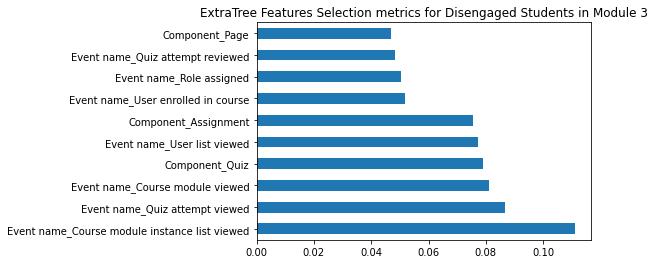

In [46]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X3s,y3s)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X3s.columns)
plt.title('ExtraTree Features Selection metrics for Disengaged Students in Module 3')
feat_importances.nlargest(10).plot(kind='barh')
plt.show()


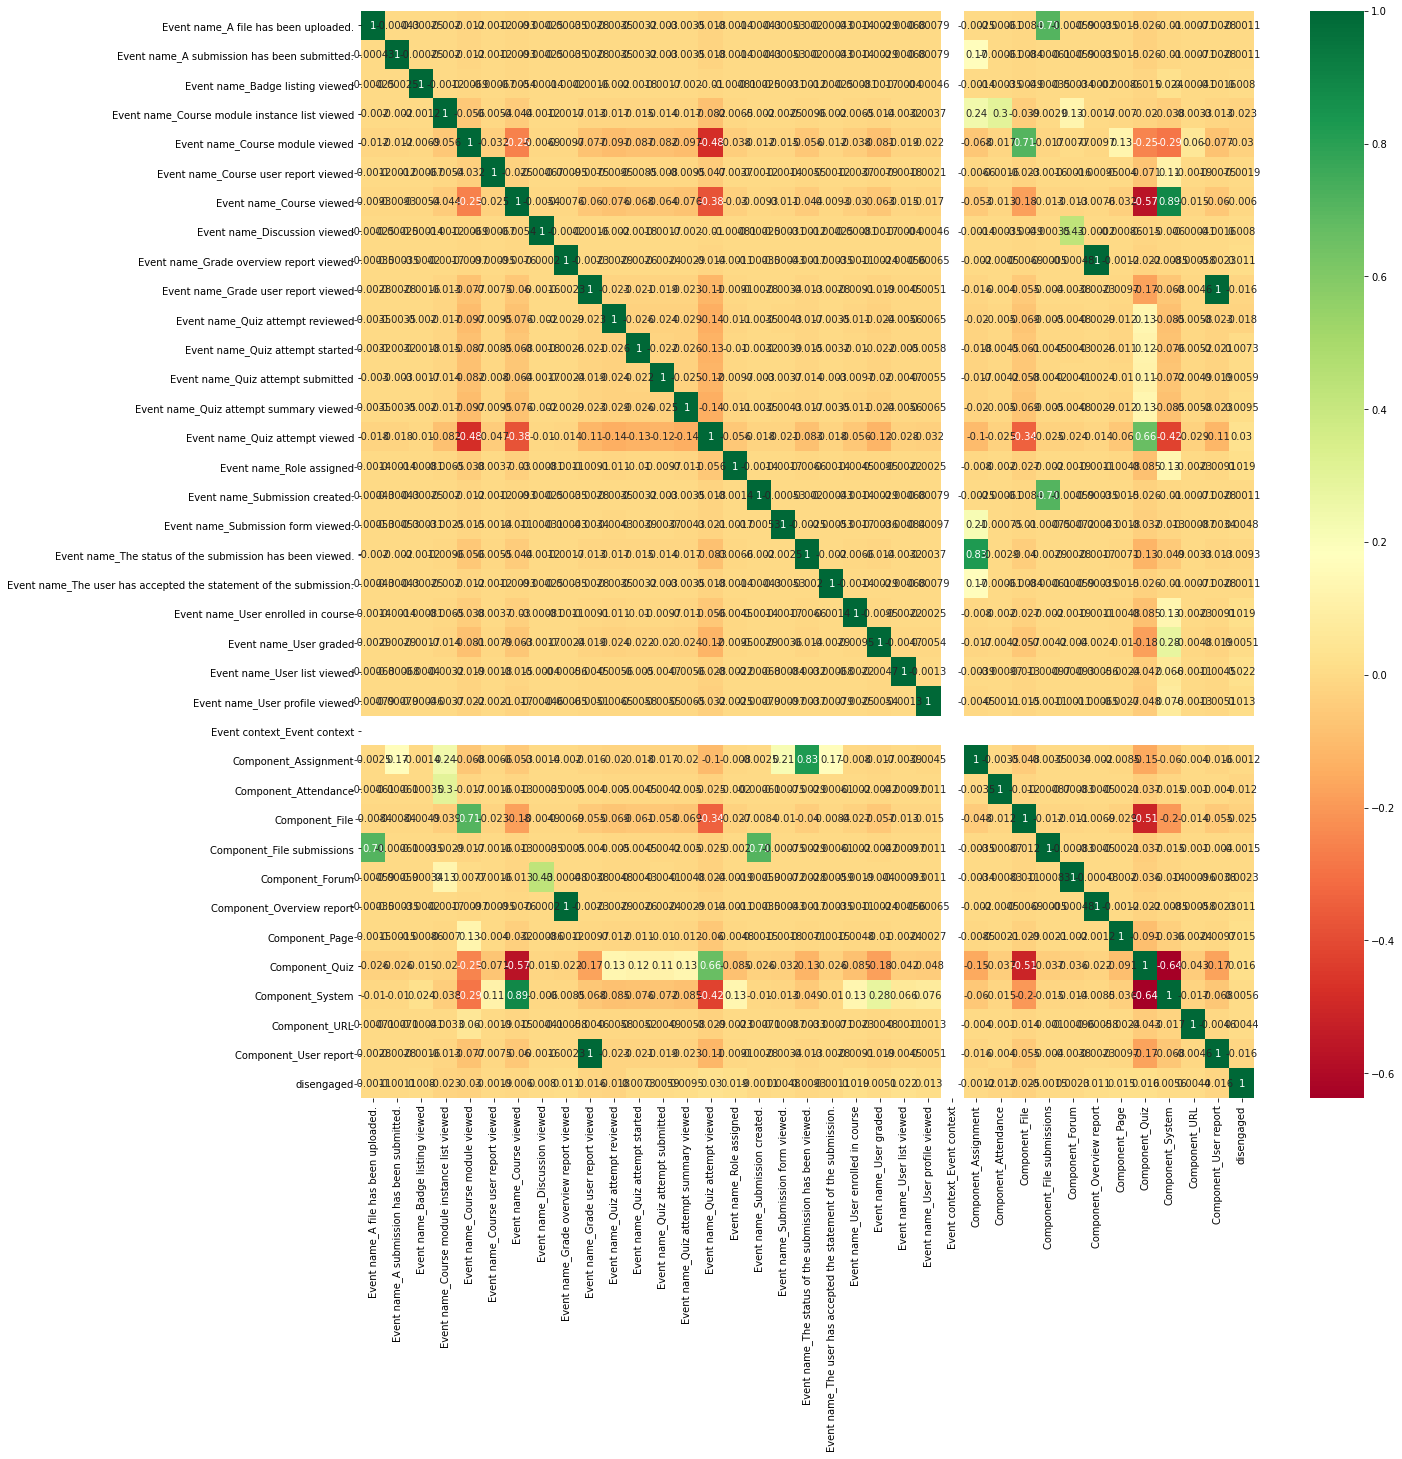

In [47]:
#get correlations of each features in dataset
corrmat = merge_subset3.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(merge_subset3[top_corr_features].corr(),annot=True,cmap="RdYlGn")


In [45]:
#EndFS3.1
# 4                 Event name_Course module viewed  9.137456
#27                                 Component_File  7.532799
#14                 Event name_Quiz attempt viewed  7.458128
#3   Event name_Course module instance list viewed  7.434958
#22                    Event name_User list viewed  6.729543
#15                       Event name_Role assigned  5.074340
#20             Event name_User enrolled in course  5.074340
#10               Event name_Quiz attempt reviewed  4.278265
#9             Event name_Grade user report viewed  3.622155
#35                          Component_User report  3.622155
#
#

In [48]:
featselect3 = X3s[['Event name_Course module viewed','Component_File','Event name_Quiz attempt viewed','Event name_Course module instance list viewed','Event name_User list viewed','Event name_Role assigned','Event name_User enrolled in course','Event name_Quiz attempt reviewed','Event name_Grade user report viewed','Component_User report']]

In [49]:
Xfs3 = featselect3 # Features
yfs3 = y3s # Target variable


In [50]:
Xfs3.head(2)

,Event name_Course module viewed,Component_File,Event name_Quiz attempt viewed,Event name_Course module instance list viewed,Event name_User list viewed,Event name_Role assigned,Event name_User enrolled in course,Event name_Quiz attempt reviewed,Event name_Grade user report viewed,Component_User report
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0


In [51]:
yfs3.head()

0    1
1    1
2    0
3    0
4    0
Name: disengaged, dtype: int64

In [53]:
# Split dataset into training set and test set
Xfs3_train, Xfs3_test, yfs3_train, yfs3_test = train_test_split(Xfs3, yfs3, test_size=0.3, random_state=1) # 70% training and 30% test


In [54]:
# Create Decision Tree classifer object
dtclffs3 = DecisionTreeClassifier()

# Train Decision Tree Classifer
dtclffs3 = dtclffs3.fit(Xfs3_train,yfs3_train)

#Predict the response for test dataset
yfs3_pred = dtclffs3.predict(Xfs3_test)


In [55]:
# Perform 10-fold CV
cvscores_10 = cross_val_score(dtclffs3, Xfs3_train, yfs3_train, cv = 10)
print(np.mean(cvscores_10))

0.6904051514540224


In [57]:
# Instantiate the classifier
rfclffs3 = RandomForestClassifier(n_estimators =20)

# Fit to the training data
rfclffs3.fit(Xfs3_train, yfs3_train)

# Compute accuracy
print(rfclffs3.score(Xfs3_train, yfs3_train))


0.690405029372359


In [82]:
cvscores_10rf = cross_val_score(rfclffs3, Xfs3_train, yfs3_train, cv = 10)
print(np.mean(cvscores_10rf))

0.690405191885


In [58]:
from sklearn.svm import SVC

svcfs3 = SVC(kernel='linear',C=0.1)

#Train it, or "fit it", to the data:
svcfs3.fit(Xfs3_train, yfs3_train)

# Compute accuracy
print(svcfs3.score(Xfs3_train, yfs3_train))


0.690405029372359


In [59]:
cvscores_10svc = cross_val_score(svcfs3, Xfs3_train, yfs3_train, cv = 10)
print(np.mean(cvscores_10svc))

0.6904051514540224


In [60]:
from sklearn import metrics
cnflr3_matrix = metrics.confusion_matrix(yfs3_test, ylg3_pred)
cnflr3_matrix


NameError: name 'ylg3_pred' is not defined

In [ ]:

from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(yfs3_test, yfs3_pred))
# 69 %


In [ ]:
yfs3_test.head(5)

In [55]:
# Import precision_score
from sklearn.metrics import precision_score

# Print the precision
print(precision_score(yfs3_test, yfs3_pred))


0.6900697283


In [56]:
# Import recall_score
from sklearn.metrics import recall_score

# Print the recall
print(recall_score(yfs3_test, yfs3_pred))


1.0


In [61]:
print("Accuracy:",metrics.accuracy_score(yfs3_test, yfs3_pred))
print("Precision:",metrics.precision_score(yfs3_test, yfs3_pred))
print("Recall:",metrics.recall_score(yfs3_test, yfs3_pred))
print("F1 Score",metrics.f1_score(yfs3_test, yfs3_pred))


Accuracy: 0.6900697283000722
Precision: 0.6900697283000722
Recall: 1.0
F1 Score 0.8166168729549013


In [62]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logregfs3 = LogisticRegression()

# fit the model with data
logregfs3.fit(Xfs3_train,yfs3_train)

#
ylg3_pred=logregfs3.predict(Xfs3_test)


In [63]:
# Perform 3-fold CV
cvscores_3 = cross_val_score(logregfs3, Xfs3_train, yfs3_train, cv = 3)
print(np.mean(cvscores_3))

# Perform 10-fold CV
cvscores_10 = cross_val_score(logregfs3, Xfs3_train, yfs3_train, cv = 10)
print(np.mean(cvscores_10))

0.6904050440371924
0.6904051514540224


In [64]:
from sklearn import metrics
cnflr3_matrix = metrics.confusion_matrix(yfs3_test, ylg3_pred)
cnflr3_matrix


array([[   0, 1289],
       [   0, 2870]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

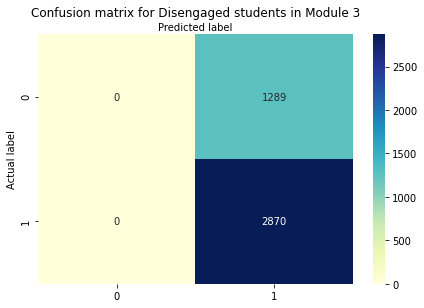

In [65]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnflr3_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for Disengaged students in Module 3', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
#TP 2870
#TN = 0
#FP = 0
#FN = 1289


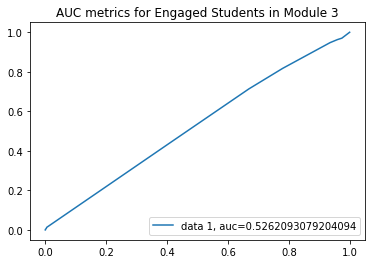

In [66]:
ylg3_pred_proba = logregfs3.predict_proba(Xfs3_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(yfs3_test,  ylg3_pred_proba)
auc = metrics.roc_auc_score(yfs3_test, ylg3_pred_proba)
plt.title('AUC metrics for Engaged Students in Module 3')
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()
# AUC score 1 represents perfect classifier, and 0.5 represents a worthless classifier.
#


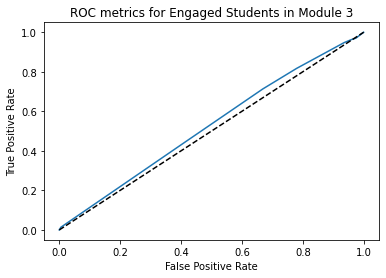

In [67]:
# Calculate the roc metrics
fpr, tpr, thresholds = roc_curve(yfs3_test, ylg3_pred_proba)

# Plot the ROC curve
plt.plot(fpr, tpr)

# Add labels and diagonal line
plt.title('ROC metrics for Engaged Students in Module 3')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot([0, 1], [0, 1], "k--")
plt.show()


In [68]:
# Generate the confusion matrix and classification report
print(confusion_matrix(yfs3_test, ylg3_pred))
print(classification_report(yfs3_test, ylg3_pred))


[[   0 1289]
 [   0 2870]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1289
           1       0.69      1.00      0.82      2870

    accuracy                           0.69      4159
   macro avg       0.35      0.50      0.41      4159
weighted avg       0.48      0.69      0.56      4159



C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [69]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(yfs3_test, yfs3_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(yfs3_test, yfs3_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(yfs3_test, yfs3_pred)))

Mean Absolute Error: 0.3099302716999279
Mean Squared Error: 0.3099302716999279
Root Mean Squared Error: 0.5567138148994759


In [ ]:
#``````````````````

In [70]:
# Instantiate bootstrap aggregation model
bagged_model = BaggingClassifier(n_estimators=50, random_state=123)

# Fit
bagged_model.fit(Xfs3_train, yfs3_train)

# Predict
bagged_pred = bagged_model.predict(Xfs3_test)

#print(logregfs1.score(Xfs_train, yfs_train))

# Print accuracy score
print(accuracy_score(yfs3_test, bagged_pred))


0.6900697283000722


In [71]:
# Boosting model
boosted_model = AdaBoostClassifier(n_estimators=50, random_state=123)

# Fit
boosted_model_fit = boosted_model.fit(Xfs3_train, yfs3_train)

# Predict
boosted_pred = boosted_model_fit.predict(Xfs3_test)

# Print model accuracy
print(accuracy_score(yfs3_test, boosted_pred))


0.6900697283000722


In [72]:
import xgboost as xgb

In [73]:
# Instantiate
xgb = XGBClassifier(random_state=123, learning_rate=0.1, n_estimators=10, max_depth=3)

# Fit
xgb = xgb.fit(Xfs3_train, yfs3_train)

# Predict
xgb_pred = xgb.predict(Xfs3_test)

# Print accuracy score
print('Final prediction score: [%.8f]' % accuracy_score(yfs3_test, xgb_pred))


Final prediction score: [0.69006973]


In [ ]:
#```````````````````

In [63]:
#MissingValues3

In [64]:
merge_subset3_nullity = merge_subset3.isnull()

In [65]:
merge_subset3_nullity.mean() * 100


# Calculate percentage of missing values
missing_values_percent = merge_subset3_nullity.mean() * 100
print('Percentage of Missing Values:\n', missing_values_percent)

# 5.8 percent of missing values

Percentage of Missing Values:
 Time                                                                 0.0
User full name                                                       0.0
Date                                                                 0.0
First name                                                           0.0
Last name                                                            0.0
Event name_A file has been uploaded.                                 0.0
Event name_A submission has been submitted.                          0.0
Event name_Badge listing viewed                                      0.0
Event name_Course module instance list viewed                        0.0
Event name_Course module viewed                                      0.0
Event name_Course user report viewed                                 0.0
Event name_Course viewed                                             0.0
Event name_Discussion viewed                                         0.0
Event name_Grade ove

In [66]:
merge_subset3_nullity.sum()

# Calculate total of missing values
missing_values_sum = merge_subset3_nullity.sum()

In [67]:
merge_subset3_nullity.tail(2)

,Time,User full name,Date,First name,Last name,Event name_A file has been uploaded.,Event name_A submission has been submitted.,Event name_Badge listing viewed,Event name_Course module instance list viewed,Event name_Course module viewed,...,Component_File,Component_File submissions,Component_Forum,Component_Overview report,Component_Page,Component_Quiz,Component_System,Component_URL,Component_User report,disengaged
13860,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
13861,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [68]:
print('Total Missing Values:\n', missing_values_sum)

Total Missing Values:
 Time                                                                 0
User full name                                                       0
Date                                                                 0
First name                                                           0
Last name                                                            0
Event name_A file has been uploaded.                                 0
Event name_A submission has been submitted.                          0
Event name_Badge listing viewed                                      0
Event name_Course module instance list viewed                        0
Event name_Course module viewed                                      0
Event name_Course user report viewed                                 0
Event name_Course viewed                                             0
Event name_Discussion viewed                                         0
Event name_Grade overview report viewed               

In [74]:
m3mg = module3mg[['First name', 'Surname', 'ID number', 'Course total (Real)', 'Assignment: Class Test (Real)', 'Assignment: Final CA Grade (out of 100%) (Real)', 'Assignment: Lab 1 (Real)', 'Assignment: Lab 2 (Real)', 'Assignment: Lab 3 (Real)', 'Assignment: Lab 4  (Real)', 'Assignment: Lab 5 (Real)', 'Assignment: Lab 6 (Real)', 'Assignment: PCL (Real)', 'Assignment: RCL (Real)', 'Quiz: Quiz 1 (Real)', 'Quiz: Quiz 2 (Real)', 'Quiz: Quiz 3 (Real)', 'Quiz: Quiz 4 (Real)', 'Quiz: Quiz 5 (Real)', 'Quiz: Quiz 6 (Real)', 'Quiz: Quiz 7 (Real)', 'Quiz: Quiz 8 (Real)']]

In [75]:
m3mg['Course total (Real)'].mean()

56.96904761904762

In [76]:
m3mg.head(2)

,First name,Surname,ID number,Course total (Real),Assignment: Class Test (Real),Assignment: Final CA Grade (out of 100%) (Real),Assignment: Lab 1 (Real),Assignment: Lab 2 (Real),Assignment: Lab 3 (Real),Assignment: Lab 4 (Real),...,Assignment: PCL (Real),Assignment: RCL (Real),Quiz: Quiz 1 (Real),Quiz: Quiz 2 (Real),Quiz: Quiz 3 (Real),Quiz: Quiz 4 (Real),Quiz: Quiz 5 (Real),Quiz: Quiz 6 (Real),Quiz: Quiz 7 (Real),Quiz: Quiz 8 (Real)
0,a8NM,bDqB,U8NMDqBG,53.10,13,43,64,50,23,61,...,55,0,97.11,99.17,92.31,0.0,83.85,0.0,75.0,0.0
1,aSnR,bGk9,VSnRGk9O,43.06,15,15,41,30,0,0,...,0,0,0.00,82.92,0.00,0.0,60.00,57.5,0.0,0.0


In [77]:
# Create a new column called df.engaged where the value is yes
# if df.age is greater than 55 and no if not
m3mg['disengaged'] = np.where(m3mg['Course total (Real)']<=55, '1', '0')


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [78]:
m3mg

,First name,Surname,ID number,Course total (Real),Assignment: Class Test (Real),Assignment: Final CA Grade (out of 100%) (Real),Assignment: Lab 1 (Real),Assignment: Lab 2 (Real),Assignment: Lab 3 (Real),Assignment: Lab 4 (Real),...,Assignment: RCL (Real),Quiz: Quiz 1 (Real),Quiz: Quiz 2 (Real),Quiz: Quiz 3 (Real),Quiz: Quiz 4 (Real),Quiz: Quiz 5 (Real),Quiz: Quiz 6 (Real),Quiz: Quiz 7 (Real),Quiz: Quiz 8 (Real),disengaged
0,a8NM,bDqB,U8NMDqBG,53.10,13,43,64,50,23,61,...,0,97.11,99.17,92.31,0.00,83.85,0.0,75.0,0.0,1
1,aSnR,bGk9,VSnRGk9O,43.06,15,15,41,30,0,0,...,0,0.00,82.92,0.00,0.00,60.00,57.5,0.0,0.0,1
2,aAK5,bSAb,tAK5SAbE,78.78,20,74,78,77,94,100,...,0,92.22,85.83,100.00,30.00,60.00,100.0,87.5,0.0,0
3,a4jV,bO8M,14jVO8M7,68.22,73,63,66,54,48,63,...,0,100.00,99.58,100.00,32.50,60.00,99.0,72.5,0.0,0
4,aa14,bMdv,ba14Mdv9,67.37,35,49,64,48,49,71,...,0,100.00,88.75,100.00,0.00,0.00,100.0,75.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,aMPU,b43l,UMPU43lx,83.71,48,80,81,76,77,81,...,0,97.33,88.75,100.00,95.00,100.00,94.5,75.0,87.5,0
59,aPi9,bECZ,uPi9ECZm,51.77,18,29,0,0,0,0,...,0,51.56,0.00,0.00,98.75,61.54,0.0,0.0,0.0,1
60,aBlD,bnnW,mBlDnnWk,0.00,0,0,0,0,0,0,...,0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,1
61,aW3J,bhQ6,LW3JhQ6U,52.50,28,38,58,55,60,0,...,0,97.78,81.67,30.77,0.00,30.77,59.5,75.0,0.0,1


In [79]:
X3ss = m3mg.iloc[:,4:22]  #independent columns
y3ss = m3mg.iloc[:,-1]    #target column i.e engaged


In [80]:
X3ss.head()

,Assignment: Class Test (Real),Assignment: Final CA Grade (out of 100%) (Real),Assignment: Lab 1 (Real),Assignment: Lab 2 (Real),Assignment: Lab 3 (Real),Assignment: Lab 4 (Real),Assignment: Lab 5 (Real),Assignment: Lab 6 (Real),Assignment: PCL (Real),Assignment: RCL (Real),Quiz: Quiz 1 (Real),Quiz: Quiz 2 (Real),Quiz: Quiz 3 (Real),Quiz: Quiz 4 (Real),Quiz: Quiz 5 (Real),Quiz: Quiz 6 (Real),Quiz: Quiz 7 (Real),Quiz: Quiz 8 (Real)
0,13,43,64,50,23,61,40,0,55,0,97.11,99.17,92.31,0.0,83.85,0.0,75.0,0.0
1,15,15,41,30,0,0,0,0,0,0,0.00,82.92,0.00,0.0,60.00,57.5,0.0,0.0
2,20,74,78,77,94,100,95,93,74,0,92.22,85.83,100.00,30.0,60.00,100.0,87.5,0.0
3,73,63,66,54,48,63,48,56,57,0,100.00,99.58,100.00,32.5,60.00,99.0,72.5,0.0
4,35,49,64,48,49,71,55,0,41,0,100.00,88.75,100.00,0.0,0.00,100.0,75.0,0.0


In [81]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X3ss,y3ss)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X3ss.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features
#https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e


                                              Specs        Score
12                              Quiz: Quiz 3 (Real)  1650.441153
15                              Quiz: Quiz 6 (Real)  1055.563660
14                              Quiz: Quiz 5 (Real)   951.185606
7                          Assignment: Lab 6 (Real)   864.376083
4                          Assignment: Lab 3 (Real)   857.072434
16                              Quiz: Quiz 7 (Real)   798.045248
6                          Assignment: Lab 5 (Real)   767.964282
1   Assignment: Final CA Grade (out of 100%) (Real)   686.291194
17                              Quiz: Quiz 8 (Real)   664.054054
11                              Quiz: Quiz 2 (Real)   661.261407


[0.01767343 0.08929143 0.03176218 0.0221429  0.04685031 0.03881067
 0.03558826 0.04065424 0.03169578 0.00678457 0.07049225 0.0684536
 0.21067322 0.03103241 0.12642423 0.09187988 0.02944832 0.01034233]


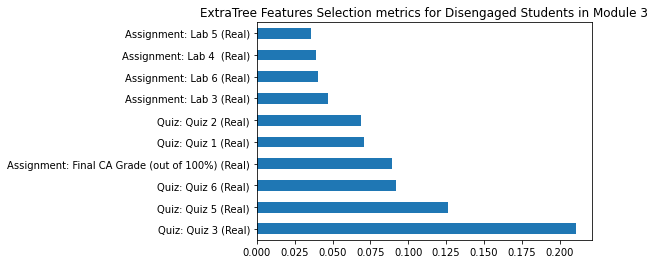

In [82]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X3ss,y3ss)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X3ss.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title('ExtraTree Features Selection metrics for Disengaged Students in Module 3')
plt.show()


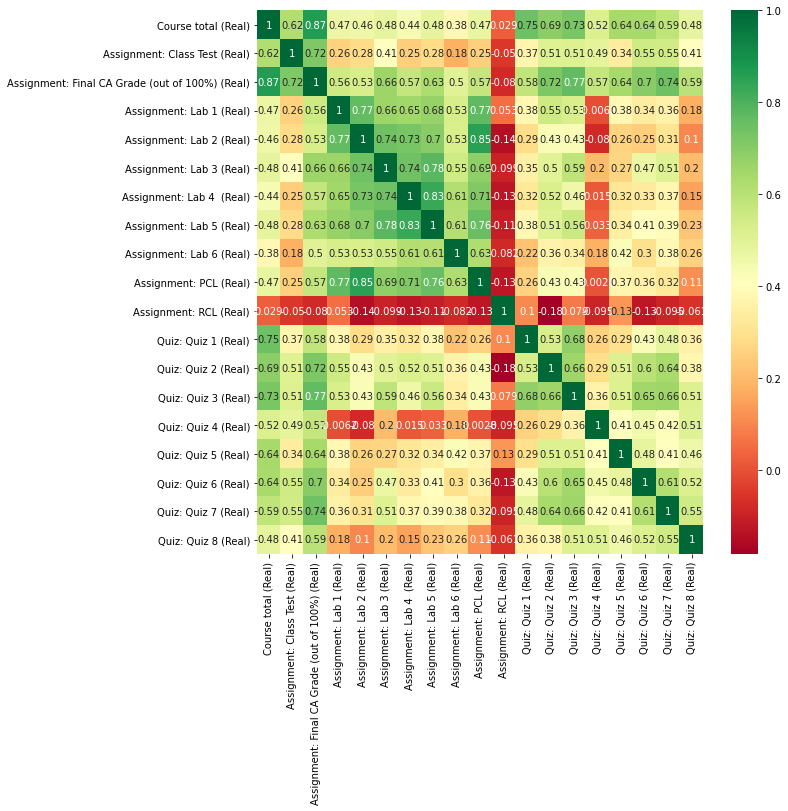

In [83]:
#get correlations of each features in dataset
corrmat = m3mg.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(m3mg[top_corr_features].corr(),annot=True,cmap="RdYlGn")


In [23]:
spear1 = m3mg['Assignment: Final CA Grade (out of 100%) (Real)']

In [24]:
spear2 = y3ss

In [25]:
spearcorr = stats.spearmanr(spear1,spear2)
print(spearcorr)
# Would suggest a weak link 

SpearmanrResult(correlation=-0.77782120321605464, pvalue=6.430404273051951e-14)


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\stats\stats.py:253: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


In [26]:
spear3 = m3mg['Quiz: Quiz 3 (Real)']

In [27]:
spearcorr = stats.spearmanr(spear3,spear2)
print(spearcorr)
# Would suggest a weak link 

SpearmanrResult(correlation=-0.73166860503654574, pvalue=9.6614129792923576e-12)


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\stats\stats.py:253: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


In [28]:
m3mg_nullity = m3mg.isnull()

In [29]:
m3mg_nullity.mean() * 100


# Calculate percentage of missing values
missing_values_percent = m3mg_nullity.mean() * 100
print('Percentage of Missing Values:\n', missing_values_percent)

# 5.8 percent of missing values

Percentage of Missing Values:
 First name                                         0.0
Surname                                            0.0
ID number                                          0.0
Course total (Real)                                0.0
Assignment: Class Test (Real)                      0.0
Assignment: Final CA Grade (out of 100%) (Real)    0.0
Assignment: Lab 1 (Real)                           0.0
Assignment: Lab 2 (Real)                           0.0
Assignment: Lab 3 (Real)                           0.0
Assignment: Lab 4  (Real)                          0.0
Assignment: Lab 5 (Real)                           0.0
Assignment: Lab 6 (Real)                           0.0
Assignment: PCL (Real)                             0.0
Assignment: RCL (Real)                             0.0
Quiz: Quiz 1 (Real)                                0.0
Quiz: Quiz 2 (Real)                                0.0
Quiz: Quiz 3 (Real)                                0.0
Quiz: Quiz 4 (Real)               

In [84]:
#Merge_subset3_1
merge_subset333 = pd.merge(module3ml_onehot,m3mg[['First name','disengaged']],on='First name', how='left')

In [85]:
merge_subset333

,Time,User full name,Date,First name,Last name,Event name_A file has been uploaded.,Event name_A submission has been submitted.,Event name_Badge listing viewed,Event name_Course module instance list viewed,Event name_Course module viewed,...,Component_File,Component_File submissions,Component_Forum,Component_Overview report,Component_Page,Component_Quiz,Component_System,Component_URL,Component_User report,disengaged
0,18:35,aJGs bxon,2019-01-21,aJGs,bxon,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,18:34,aJGs bxon,2019-01-21,aJGs,bxon,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,18:16,aOmN bXsd,2019-01-21,aOmN,bXsd,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,18:16,aOmN bXsd,2019-01-21,aOmN,bXsd,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,18:15,aOmN bXsd,2019-01-21,aOmN,bXsd,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13857,20:54,aW3J bhQ6,2018-12-03,aW3J,bhQ6,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
13858,20:54,aW3J bhQ6,2018-12-03,aW3J,bhQ6,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
13859,20:53,aW3J bhQ6,2018-12-03,aW3J,bhQ6,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
13860,20:53,aW3J bhQ6,2018-12-03,aW3J,bhQ6,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1


In [86]:
#Feature selection3_1
X333s = merge_subset333.iloc[:,5:41]  #independent columns
y333s = merge_subset333.iloc[:,-1]    #target column i.e engaged


In [87]:
X333s.head(2)

,Event name_A file has been uploaded.,Event name_A submission has been submitted.,Event name_Badge listing viewed,Event name_Course module instance list viewed,Event name_Course module viewed,Event name_Course user report viewed,Event name_Course viewed,Event name_Discussion viewed,Event name_Grade overview report viewed,Event name_Grade user report viewed,...,Component_Attendance,Component_File,Component_File submissions,Component_Forum,Component_Overview report,Component_Page,Component_Quiz,Component_System,Component_URL,Component_User report
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [88]:
y333s.head(3)

0    1
1    1
2    0
Name: disengaged, dtype: object

In [89]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X333s,y333s)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X333s.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features
#https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e


                                  Specs      Score
9   Event name_Grade user report viewed  29.320428
35                Component_User report  29.320428
27                       Component_File  25.063334
10     Event name_Quiz attempt reviewed  13.275176
15             Event name_Role assigned  11.144437
20   Event name_User enrolled in course  11.144437
21               Event name_User graded   4.035593
12    Event name_Quiz attempt submitted   3.988817
32                       Component_Quiz   3.579762
4       Event name_Course module viewed   3.565249


[0.00046973 0.00137744 0.00410955 0.02543527 0.05213243 0.01066892
 0.02332013 0.00301173 0.0060625  0.10153018 0.06902196 0.00673993
 0.01880978 0.00702092 0.06952562 0.07638966 0.00040218 0.00574483
 0.00714308 0.00175219 0.07555493 0.03079564 0.00571893 0.00987439
 0.         0.01697992 0.00516708 0.11251817 0.00188683 0.00855385
 0.00530247 0.00516403 0.0857115  0.02763081 0.00856445 0.10990898]


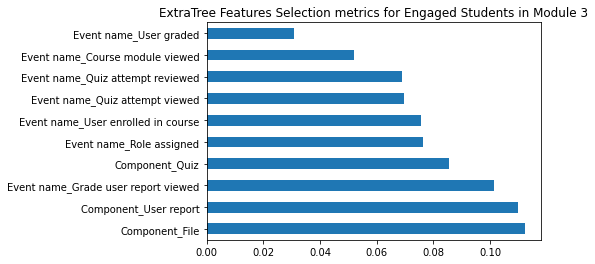

In [90]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X333s,y333s)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X333s.columns)
plt.title('ExtraTree Features Selection metrics for Engaged Students in Module 3')
feat_importances.nlargest(10).plot(kind='barh')
plt.show()


In [91]:
featselect333 = X333s[['Component_File','Component_User report','Event name_Grade user report viewed','Event name_User enrolled in course','Event name_Quiz attempt viewed','Event name_Role assigned','Event name_Quiz attempt reviewed','Component_Quiz','Event name_User graded','Event name_Role assigned']]

In [92]:
featselect333.head(2)

,Component_File,Component_User report,Event name_Grade user report viewed,Event name_User enrolled in course,Event name_Quiz attempt viewed,Event name_Role assigned,Event name_Quiz attempt reviewed,Component_Quiz,Event name_User graded,Event name_Role assigned
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0


In [93]:
Xfs333 = featselect333 # Features
yfs333 = y333s # Target variable


In [94]:
len(Xfs333)

13862

In [95]:
Xfs333.dtypes

Component_File                         uint8
Component_User report                  uint8
Event name_Grade user report viewed    uint8
Event name_User enrolled in course     uint8
Event name_Quiz attempt viewed         uint8
Event name_Role assigned               uint8
Event name_Quiz attempt reviewed       uint8
Component_Quiz                         uint8
Event name_User graded                 uint8
Event name_Role assigned               uint8
dtype: object

In [96]:
len(yfs333)

13862

In [97]:
yfs333.dtypes

dtype('O')

In [98]:

yfs333 = pd.to_numeric(yfs333)


In [99]:
yfs333.dtypes

dtype('int64')

In [100]:
yfs333.head(2)

0    1
1    1
Name: disengaged, dtype: int64

In [101]:
# Split dataset into training set and test set
Xfs333_train, Xfs333_test, yfs333_train, yfs333_test = train_test_split(Xfs333, yfs333, test_size=0.3, random_state=1) # 70% training and 30% test


In [103]:
# Create Decision Tree classifer object
dtclffs333 = DecisionTreeClassifier(max_depth = 9)

# Train Decision Tree Classifer
dtclffs333 = dtclffs333.fit(Xfs333_train,yfs333_train)

#Predict the response for test dataset
yfs333_pred = dtclffs333.predict(Xfs333_test)


In [104]:
# Compute accuracy
print(dtclffs333.score(Xfs333_train, yfs333_train))

0.7644027620323611


In [105]:
# Perform 10-fold CV
cvscores_10 = cross_val_score(dtclffs333, Xfs333_train, yfs333_train, cv = 10)
print(np.mean(cvscores_10))

0.7644028369095522


In [106]:
# Instantiate the classifier
rfclffs333 = RandomForestClassifier(n_estimators =20)

# Fit to the training data
rfclffs333.fit(Xfs333_train, yfs333_train)

# Compute accuracy
print(rfclffs333.score(Xfs333_train, yfs333_train))


0.7644027620323611


In [107]:
cvscores_10rf = cross_val_score(rfclffs333, Xfs333_train, yfs333_train, cv = 10)
print(np.mean(cvscores_10rf))

0.7644028369095522


In [108]:
from sklearn.svm import SVC

svcfs333 = SVC(kernel='linear',C=0.1)

#Train it, or "fit it", to the data:
svcfs333.fit(Xfs333_train, yfs333_train)

# Compute accuracy
print(svcfs333.score(Xfs333_train, yfs333_train))


0.7644027620323611


In [109]:
cvscores_10svc = cross_val_score(svcfs333, Xfs333_train, yfs333_train, cv = 10)
print(np.mean(cvscores_10svc))

0.7644028369095522


In [110]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logregfs333 = LogisticRegression()

# fit the model with data
logregfs333.fit(Xfs333_train,yfs333_train)

#
ylg333_pred=logregfs333.predict(Xfs333_test)


In [111]:
# Compute accuracy
print(logregfs333.score(Xfs333_train, yfs333_train))

0.7644027620323611


In [112]:
# Perform 3-fold CV
cvscores_3 = cross_val_score(logregfs333, Xfs333_train, yfs333_train, cv = 3)
print(np.mean(cvscores_3))

# Perform 10-fold CV
cvscores_10 = cross_val_score(logregfs333, Xfs333_train, yfs333_train, cv = 10)
print(np.mean(cvscores_10))

0.7644027570280606
0.7644028369095522


In [113]:
from sklearn import metrics
cnflr333_matrix = metrics.confusion_matrix(yfs333_test, ylg333_pred)
cnflr333_matrix


array([[3137,    0],
       [1022,    0]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

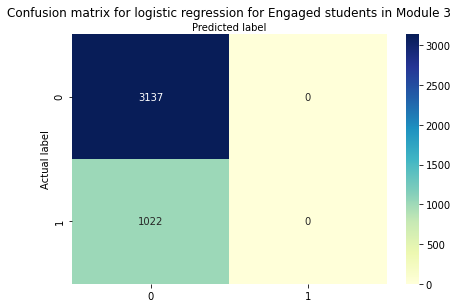

In [114]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnflr333_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for logistic regression for Engaged students in Module 3', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
#TP 1022
#TN = 0
#FP = 0
#FN = 1289


In [115]:
# Generate the confusion matrix and classification report
print(confusion_matrix(yfs333_test, ylg333_pred))
print(classification_report(yfs333_test, ylg333_pred))


[[3137    0]
 [1022    0]]
              precision    recall  f1-score   support

           0       0.75      1.00      0.86      3137
           1       0.00      0.00      0.00      1022

    accuracy                           0.75      4159
   macro avg       0.38      0.50      0.43      4159
weighted avg       0.57      0.75      0.65      4159



C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


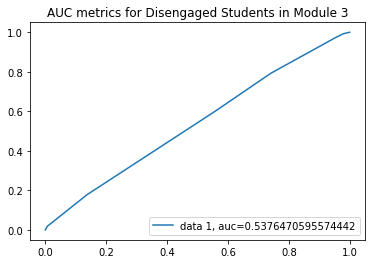

In [116]:
ylg333_pred_proba = logregfs333.predict_proba(Xfs333_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(yfs333_test,  ylg333_pred_proba)
auc = metrics.roc_auc_score(yfs333_test, ylg333_pred_proba)
plt.title('AUC metrics for Disengaged Students in Module 3')
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()
# AUC score 1 represents perfect classifier, and 0.5 represents a worthless classifier.
#


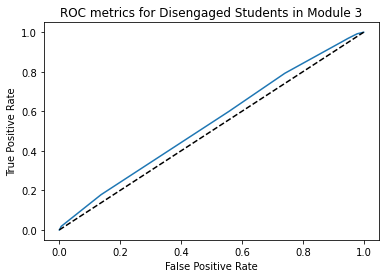

In [117]:
# Calculate the roc metrics
fpr, tpr, thresholds = roc_curve(yfs333_test, ylg333_pred_proba)

# Plot the ROC curve
plt.plot(fpr, tpr)

# Add labels and diagonal line
plt.title('ROC metrics for Disengaged Students in Module 3')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot([0, 1], [0, 1], "k--")
plt.show()


In [118]:
print("Accuracy:",metrics.accuracy_score(yfs333_test, yfs333_pred))
print("Precision:",metrics.precision_score(yfs333_test, yfs333_pred))
print("Recall:",metrics.recall_score(yfs333_test, yfs333_pred))
print("F1 Score",metrics.f1_score(yfs333_test, yfs333_pred))


Accuracy: 0.7542678528492426
Precision: 0.0
Recall: 0.0
F1 Score 0.0


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [119]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(yfs333_test, yfs333_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(yfs333_test, yfs333_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(yfs333_test, yfs333_pred)))

Mean Absolute Error: 0.2457321471507574
Mean Squared Error: 0.2457321471507574
Root Mean Squared Error: 0.49571377542969025


In [ ]:
#``````

In [122]:
# Instantiate bootstrap aggregation model
bagged_model = BaggingClassifier(n_estimators=50, random_state=123)

# Fit
bagged_model.fit(Xfs333_train, yfs333_train)

# Predict
bagged_pred = bagged_model.predict(Xfs333_test)

#print(logregfs1.score(Xfs_train, yfs_train))

# Print accuracy score
print(accuracy_score(yfs333_test, bagged_pred))


0.7542678528492426


In [123]:
# Boosting model
boosted_model = AdaBoostClassifier(n_estimators=50, random_state=123)

# Fit
boosted_model_fit = boosted_model.fit(Xfs333_train, yfs333_train)

# Predict
boosted_pred = boosted_model_fit.predict(Xfs333_test)

# Print model accuracy
print(accuracy_score(yfs333_test, boosted_pred))


0.7542678528492426


In [124]:
import xgboost as xgb

In [ ]:
#``````

In [ ]:
#Triv1

In [127]:
FirstFive3.head(2)

,Time,User full name,Event context,Component,Event name,Date
4563,23:55,aTcu bg6b,Event context,Quiz,Quiz attempt viewed,2018-10-12
4564,23:49,aA6B bBfk,Event context,System,Course viewed,2018-10-12


In [128]:
FirstFive3_onehot = FirstFive3.copy()
FirstFive3_onehot = pd.get_dummies(FirstFive3_onehot, columns=['Event name'], prefix = ['Event name'])
FirstFive3_onehot = pd.get_dummies(FirstFive3_onehot, columns=['Event context'], prefix = ['Event context'])
FirstFive3_onehot = pd.get_dummies(FirstFive3_onehot, columns=['Component'], prefix = ['Component'])


print(FirstFive3_onehot.head())


        Time User full name       Date  Event name_A file has been uploaded.  \
4563   23:55      aTcu bg6b 2018-10-12                                     0   
4564   23:49      aA6B bBfk 2018-10-12                                     0   
4565   23:42      aTcu bg6b 2018-10-12                                     0   
4566   23:42      aTcu bg6b 2018-10-12                                     0   
4567   23:42      aTcu bg6b 2018-10-12                                     0   

      Event name_A submission has been submitted.  \
4563                                            0   
4564                                            0   
4565                                            0   
4566                                            0   
4567                                            0   

      Event name_Course module instance list viewed  \
4563                                              0   
4564                                              0   
4565                               

In [129]:
FirstFive3_onehot.head(2)

,Time,User full name,Date,Event name_A file has been uploaded.,Event name_A submission has been submitted.,Event name_Course module instance list viewed,Event name_Course module viewed,Event name_Course user report viewed,Event name_Course viewed,Event name_Grade user report viewed,...,Component_Assignment,Component_Attendance,Component_File,Component_File submissions,Component_Forum,Component_Page,Component_Quiz,Component_System,Component_URL,Component_User report
4563,23:55,aTcu bg6b,2018-10-12,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4564,23:49,aA6B bBfk,2018-10-12,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [130]:
#Split string User full name which adds two new columns
# new data frame with split value columns 
new3aa = FirstFive3_onehot["User full name"].str.split(" ", n = 1, expand = True)

# making separate first name column from new data frame 
FirstFive3_onehot["First name"]= new3aa[0] 

# making separate last name column from new data frame 
FirstFive3_onehot["Last name"]= new3aa[1] 


In [131]:
#Merge_subset3_1
merge_subset3333 = pd.merge(FirstFive3_onehot,m3mg[['First name','disengaged']],on='First name', how='left')

In [132]:
merge_533 = pd.merge(FirstFive3_onehot,m3mg[['First name','disengaged']],on='First name', how='left')

In [133]:
merge_533.head(2)

,Time,User full name,Date,Event name_A file has been uploaded.,Event name_A submission has been submitted.,Event name_Course module instance list viewed,Event name_Course module viewed,Event name_Course user report viewed,Event name_Course viewed,Event name_Grade user report viewed,...,Component_File submissions,Component_Forum,Component_Page,Component_Quiz,Component_System,Component_URL,Component_User report,First name,Last name,disengaged
0,23:55,aTcu bg6b,2018-10-12,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,aTcu,bg6b,0
1,23:49,aA6B bBfk,2018-10-12,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,aA6B,bBfk,0


In [134]:
Xt5333 = merge_533.iloc[:,5:35]  #independent columns
yt5333 = merge_533.iloc[:,-1]    #target column i.e engaged


In [135]:
Xt5333.columns

Index(['Event name_Course module instance list viewed',
       'Event name_Course module viewed',
       'Event name_Course user report viewed', 'Event name_Course viewed',
       'Event name_Grade user report viewed',
       'Event name_Quiz attempt reviewed', 'Event name_Quiz attempt started',
       'Event name_Quiz attempt submitted',
       'Event name_Quiz attempt summary viewed',
       'Event name_Quiz attempt viewed', 'Event name_Role assigned',
       'Event name_Submission created.', 'Event name_Submission form viewed.',
       'Event name_The status of the submission has been viewed.',
       'Event name_The user has accepted the statement of the submission.',
       'Event name_User enrolled in course', 'Event name_User graded',
       'Event name_User list viewed', 'Event name_User profile viewed',
       'Event context_Event context', 'Component_Assignment',
       'Component_Attendance', 'Component_File', 'Component_File submissions',
       'Component_Forum', 'Componen

In [136]:
Xt5333.head(2)

,Event name_Course module instance list viewed,Event name_Course module viewed,Event name_Course user report viewed,Event name_Course viewed,Event name_Grade user report viewed,Event name_Quiz attempt reviewed,Event name_Quiz attempt started,Event name_Quiz attempt submitted,Event name_Quiz attempt summary viewed,Event name_Quiz attempt viewed,...,Component_Assignment,Component_Attendance,Component_File,Component_File submissions,Component_Forum,Component_Page,Component_Quiz,Component_System,Component_URL,Component_User report
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [137]:
yt5333.head(2)

0    0
1    0
Name: disengaged, dtype: object

In [138]:

yt5333 = pd.to_numeric(yt5333)


In [139]:
yt5333.dtypes

dtype('int64')

In [140]:

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(Xt5333,yt5333)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(Xt5333.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features
#https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36


                                   Specs      Score
20                  Component_Assignment  10.061079
4    Event name_Grade user report viewed   7.066430
29                 Component_User report   7.066430
23            Component_File submissions   4.811482
3               Event name_Course viewed   4.287538
2   Event name_Course user report viewed   3.325379
22                        Component_File   3.022280
9         Event name_Quiz attempt viewed   2.994399
10              Event name_Role assigned   2.633022
15    Event name_User enrolled in course   2.633022


[0.04465729 0.0673755  0.04330206 0.04533165 0.05434935 0.01121723
 0.00489719 0.00312017 0.00644753 0.09807381 0.03365738 0.00876979
 0.01433276 0.04454871 0.01305592 0.0326219  0.01363878 0.01150848
 0.00882274 0.         0.12338937 0.00367602 0.06518221 0.05255929
 0.00803704 0.01904931 0.07373692 0.02205796 0.03276214 0.03982148]


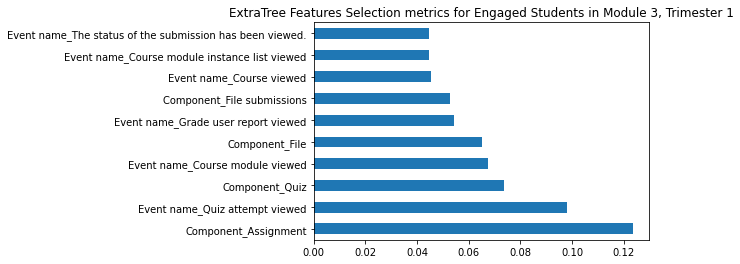

In [141]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(Xt5333,yt5333)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=Xt5333.columns)
plt.title('ExtraTree Features Selection metrics for Engaged Students in Module 3, Trimester 1')
feat_importances.nlargest(10).plot(kind='barh')
plt.show()


In [142]:
feattime5333 = Xt5333[['Component_Assignment','Event name_Quiz attempt viewed','Component_Quiz','Component_File','Component_File submissions','Event name_Grade user report viewed','Event name_Course module viewed','Component_User report','Event name_The status of the submission has been viewed.']]

In [143]:
feattime5333.head(2)

,Component_Assignment,Event name_Quiz attempt viewed,Component_Quiz,Component_File,Component_File submissions,Event name_Grade user report viewed,Event name_Course module viewed,Component_User report,Event name_The status of the submission has been viewed.
0,0,1,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0


In [144]:
Xt3a333 = feattime5333 # Features
yt3a333 = yt5333 # Target variable

In [145]:
# Create training and testing sets
Xt3a333_train, Xt3a333_test, yt3a333_train, yt3a333_test = train_test_split(Xt3a333, yt3a333, test_size=0.3)


In [146]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logregt3a333 = LogisticRegression()

# fit the model with data
logregt3a333.fit(Xt3a333_train,yt3a333_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [147]:
yt3a333_pred=logregt3a333.predict(Xt3a333_test)

In [148]:
# Compute accuracy
print(logregt3a333.score(Xt3a333_test, yt3a333_test))

0.7069096431283219


In [149]:
# Perform 3-fold CV
cvscores_3 = cross_val_score(logregt3a333, Xt3a333_train, yt3a333_train, cv = 3)
print(np.mean(cvscores_3))

# Perform 10-fold CV
cvscores_10 = cross_val_score(logregt3a333, Xt3a333_train, yt3a333_train, cv = 10)
print(np.mean(cvscores_10))

0.7071268419715446
0.7074527264266678


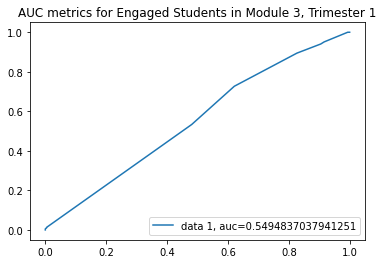

In [150]:
ylg3a333_pred_proba = logregt3a333.predict_proba(Xt3a333_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(yt3a333_test,  ylg3a333_pred_proba)
auc = metrics.roc_auc_score(yt3a333_test, ylg3a333_pred_proba)
plt.title('AUC metrics for Engaged Students in Module 3, Trimester 1')
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()
# AUC score for the case is 0.55. AUC score 1 represents perfect classifier, and 0.5 represents a worthless classifier.
#


In [151]:
print("Accuracy:",metrics.accuracy_score(yt3a333_test, yt3a333_pred))
print("Precision:",metrics.precision_score(yt3a333_test, yt3a333_pred))
print("Recall:",metrics.recall_score(yt3a333_test, yt3a333_pred))
print("F1 Score",metrics.f1_score(yt3a333_test, yt3a333_pred))


Accuracy: 0.7069096431283219
Precision: 1.0
Recall: 0.005154639175257732
F1 Score 0.010256410256410256


In [152]:
# Instantiate the classifier
rfclffs3a333 = RandomForestClassifier(n_estimators =10)

# Fit to the training data
rfclffs3a333.fit(Xt3a333_train, yt3a333_train)

# Compute accuracy
print(rfclffs3a333.score(Xt3a333_test, yt3a333_test))


0.7076689445709947


In [153]:
# Perform 10-fold CV
cvscores_10rf = cross_val_score(rfclffs3a333, Xt3a333_train, yt3a333_train, cv = 10)
print(np.mean(cvscores_10rf))

0.7077784593256906


In [154]:
from sklearn.svm import SVC

svcfs3a333 = SVC(kernel='linear',C=0.1)

#Train it, or "fit it", to the data:
svcfs3a333.fit(Xt3a333_train, yt3a333_train)

# Compute accuracy
print(svcfs3a333.score(Xt3a333_test, yt3a333_test))


0.7053910402429765


In [155]:
# Perform 10-fold CV
cvscores_10svc = cross_val_score(svcfs3a333, Xt3a333_train, yt3a333_train, cv = 10)
print(np.mean(cvscores_10svc))

0.7068012606286221


In [156]:
# Create Decision Tree classifer object
dtclffs3a333 = DecisionTreeClassifier()

# Train Decision Tree Classifer
dtclffs3a333 = dtclffs3a333.fit(Xt3a333_train,yt3a333_train)

#Predict the response for test dataset
yfs3a333_pred = dtclffs3a333.predict(Xt3a333_test)


In [158]:
# Compute accuracy
print(dtclffs3a333.score(Xt3a333_test, yt3a333_test))

0.7076689445709947


In [159]:
# Perform 10-fold CV
cvscores_10dt3a333 = cross_val_score(dtclffs3a333, Xt3a333_train, yt3a333_train, cv = 10)
print(np.mean(cvscores_10dt3a333))

0.7084299251237363


In [160]:
# Generate the confusion matrix and classification report
print(confusion_matrix(yt3a333_test, yt3a333_pred))
print(classification_report(yt3a333_test, yt3a333_pred))


[[929   0]
 [386   2]]
              precision    recall  f1-score   support

           0       0.71      1.00      0.83       929
           1       1.00      0.01      0.01       388

    accuracy                           0.71      1317
   macro avg       0.85      0.50      0.42      1317
weighted avg       0.79      0.71      0.59      1317



In [ ]:
#``````````

In [161]:
# Instantiate bootstrap aggregation model
bagged_model = BaggingClassifier(n_estimators=50, random_state=123)

# Fit
bagged_model.fit(Xt3a333_train, yt3a333_train)

# Predict
bagged_pred = bagged_model.predict(Xt3a333_test)

#print(logregfs1.score(Xfs_train, yfs_train))

# Print accuracy score
print(accuracy_score(yt3a333_test, bagged_pred))


0.7076689445709947


In [162]:
# Boosting model
boosted_model = AdaBoostClassifier(n_estimators=50, random_state=123)

# Fit
boosted_model_fit = boosted_model.fit(Xt3a333_train, yt3a333_train)

# Predict
boosted_pred = boosted_model_fit.predict(Xt3a333_test)

# Print model accuracy
print(accuracy_score(yt3a333_test, boosted_pred))


0.7076689445709947


In [163]:
import xgboost as xgb

In [164]:
# Instantiate
xgb = XGBClassifier(random_state=123, learning_rate=0.1, n_estimators=10, max_depth=3)

# Fit
xgb = xgb.fit(Xt3a333_train, yt3a333_train)

# Predict
xgb_pred = xgb.predict(Xt3a333_test)

# Print accuracy score
print('Final prediction score: [%.8f]' % accuracy_score(yt3a333_test, xgb_pred))


Final prediction score: [0.70690964]


In [ ]:
#````````

In [70]:
#Trimester1

In [165]:
FirstFive3.head(2)

,Time,User full name,Event context,Component,Event name,Date
4563,23:55,aTcu bg6b,Event context,Quiz,Quiz attempt viewed,2018-10-12
4564,23:49,aA6B bBfk,Event context,System,Course viewed,2018-10-12


In [166]:
m3og_subset.head(2)

,First name,Surname,ID number,Total CA,Exam,Total,disengaged
0,auP2,buYz,PuP2uYzI,77.714,49.0,63.357,0
1,aBlD,bnnW,mBlDnnWk,0.000,NaN,0.000,1


In [167]:
FirstFive3_onehot = FirstFive3.copy()
FirstFive3_onehot = pd.get_dummies(FirstFive3_onehot, columns=['Event name'], prefix = ['Event name'])
FirstFive3_onehot = pd.get_dummies(FirstFive3_onehot, columns=['Event context'], prefix = ['Event context'])
FirstFive3_onehot = pd.get_dummies(FirstFive3_onehot, columns=['Component'], prefix = ['Component'])


print(FirstFive3_onehot.head())


        Time User full name       Date  Event name_A file has been uploaded.  \
4563   23:55      aTcu bg6b 2018-10-12                                     0   
4564   23:49      aA6B bBfk 2018-10-12                                     0   
4565   23:42      aTcu bg6b 2018-10-12                                     0   
4566   23:42      aTcu bg6b 2018-10-12                                     0   
4567   23:42      aTcu bg6b 2018-10-12                                     0   

      Event name_A submission has been submitted.  \
4563                                            0   
4564                                            0   
4565                                            0   
4566                                            0   
4567                                            0   

      Event name_Course module instance list viewed  \
4563                                              0   
4564                                              0   
4565                               

In [168]:
FirstFive3_onehot.head(2)

,Time,User full name,Date,Event name_A file has been uploaded.,Event name_A submission has been submitted.,Event name_Course module instance list viewed,Event name_Course module viewed,Event name_Course user report viewed,Event name_Course viewed,Event name_Grade user report viewed,...,Component_Assignment,Component_Attendance,Component_File,Component_File submissions,Component_Forum,Component_Page,Component_Quiz,Component_System,Component_URL,Component_User report
4563,23:55,aTcu bg6b,2018-10-12,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4564,23:49,aA6B bBfk,2018-10-12,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [169]:
m3og_subset.head(2)

,First name,Surname,ID number,Total CA,Exam,Total,disengaged
0,auP2,buYz,PuP2uYzI,77.714,49.0,63.357,0
1,aBlD,bnnW,mBlDnnWk,0.000,NaN,0.000,1


In [170]:
#Split string User full name which adds two new columns
# new data frame with split value columns 
new3a = FirstFive3_onehot["User full name"].str.split(" ", n = 1, expand = True)

# making separate first name column from new data frame 
FirstFive3_onehot["First name"]= new3a[0] 

# making separate last name column from new data frame 
FirstFive3_onehot["Last name"]= new3a[1] 


In [171]:
merge_53 = pd.merge(FirstFive3_onehot,m3og_subset[['First name','disengaged']],on='First name', how='left')

In [172]:
merge_53.head(2)

,Time,User full name,Date,Event name_A file has been uploaded.,Event name_A submission has been submitted.,Event name_Course module instance list viewed,Event name_Course module viewed,Event name_Course user report viewed,Event name_Course viewed,Event name_Grade user report viewed,...,Component_File submissions,Component_Forum,Component_Page,Component_Quiz,Component_System,Component_URL,Component_User report,First name,Last name,disengaged
0,23:55,aTcu bg6b,2018-10-12,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,aTcu,bg6b,1
1,23:49,aA6B bBfk,2018-10-12,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,aA6B,bBfk,0


In [173]:
Xt53 = merge_53.iloc[:,5:35]  #independent columns
yt53 = merge_53.iloc[:,-1]    #target column i.e engaged


In [174]:
Xt53.head(2)

,Event name_Course module instance list viewed,Event name_Course module viewed,Event name_Course user report viewed,Event name_Course viewed,Event name_Grade user report viewed,Event name_Quiz attempt reviewed,Event name_Quiz attempt started,Event name_Quiz attempt submitted,Event name_Quiz attempt summary viewed,Event name_Quiz attempt viewed,...,Component_Assignment,Component_Attendance,Component_File,Component_File submissions,Component_Forum,Component_Page,Component_Quiz,Component_System,Component_URL,Component_User report
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [175]:
yt53.head()

0    1
1    0
2    1
3    1
4    1
Name: disengaged, dtype: int64

In [176]:

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(Xt53,yt53)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(Xt53.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features
#https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36


                                            Specs     Score
0   Event name_Course module instance list viewed  6.733930
1                 Event name_Course module viewed  5.526772
4             Event name_Grade user report viewed  4.869574
29                          Component_User report  4.869574
5                Event name_Quiz attempt reviewed  4.599132
9                  Event name_Quiz attempt viewed  3.667998
10                       Event name_Role assigned  2.928248
15             Event name_User enrolled in course  2.928248
18                 Event name_User profile viewed  2.808766
22                                 Component_File  2.069509


[0.14633579 0.09232358 0.01239805 0.02423213 0.0372135  0.06228164
 0.01974129 0.00990452 0.01942024 0.0752926  0.03723789 0.00213802
 0.00391203 0.00877671 0.00397646 0.04083882 0.00927926 0.02253915
 0.04036891 0.         0.03557927 0.01276096 0.01974277 0.00952776
 0.00652999 0.0080264  0.1405231  0.03446233 0.01679366 0.04784317]


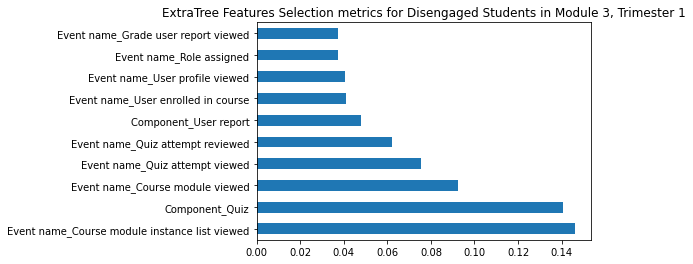

In [177]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(Xt53,yt53)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=Xt53.columns)
plt.title('ExtraTree Features Selection metrics for Disengaged Students in Module 3, Trimester 1')
feat_importances.nlargest(10).plot(kind='barh')
plt.show()


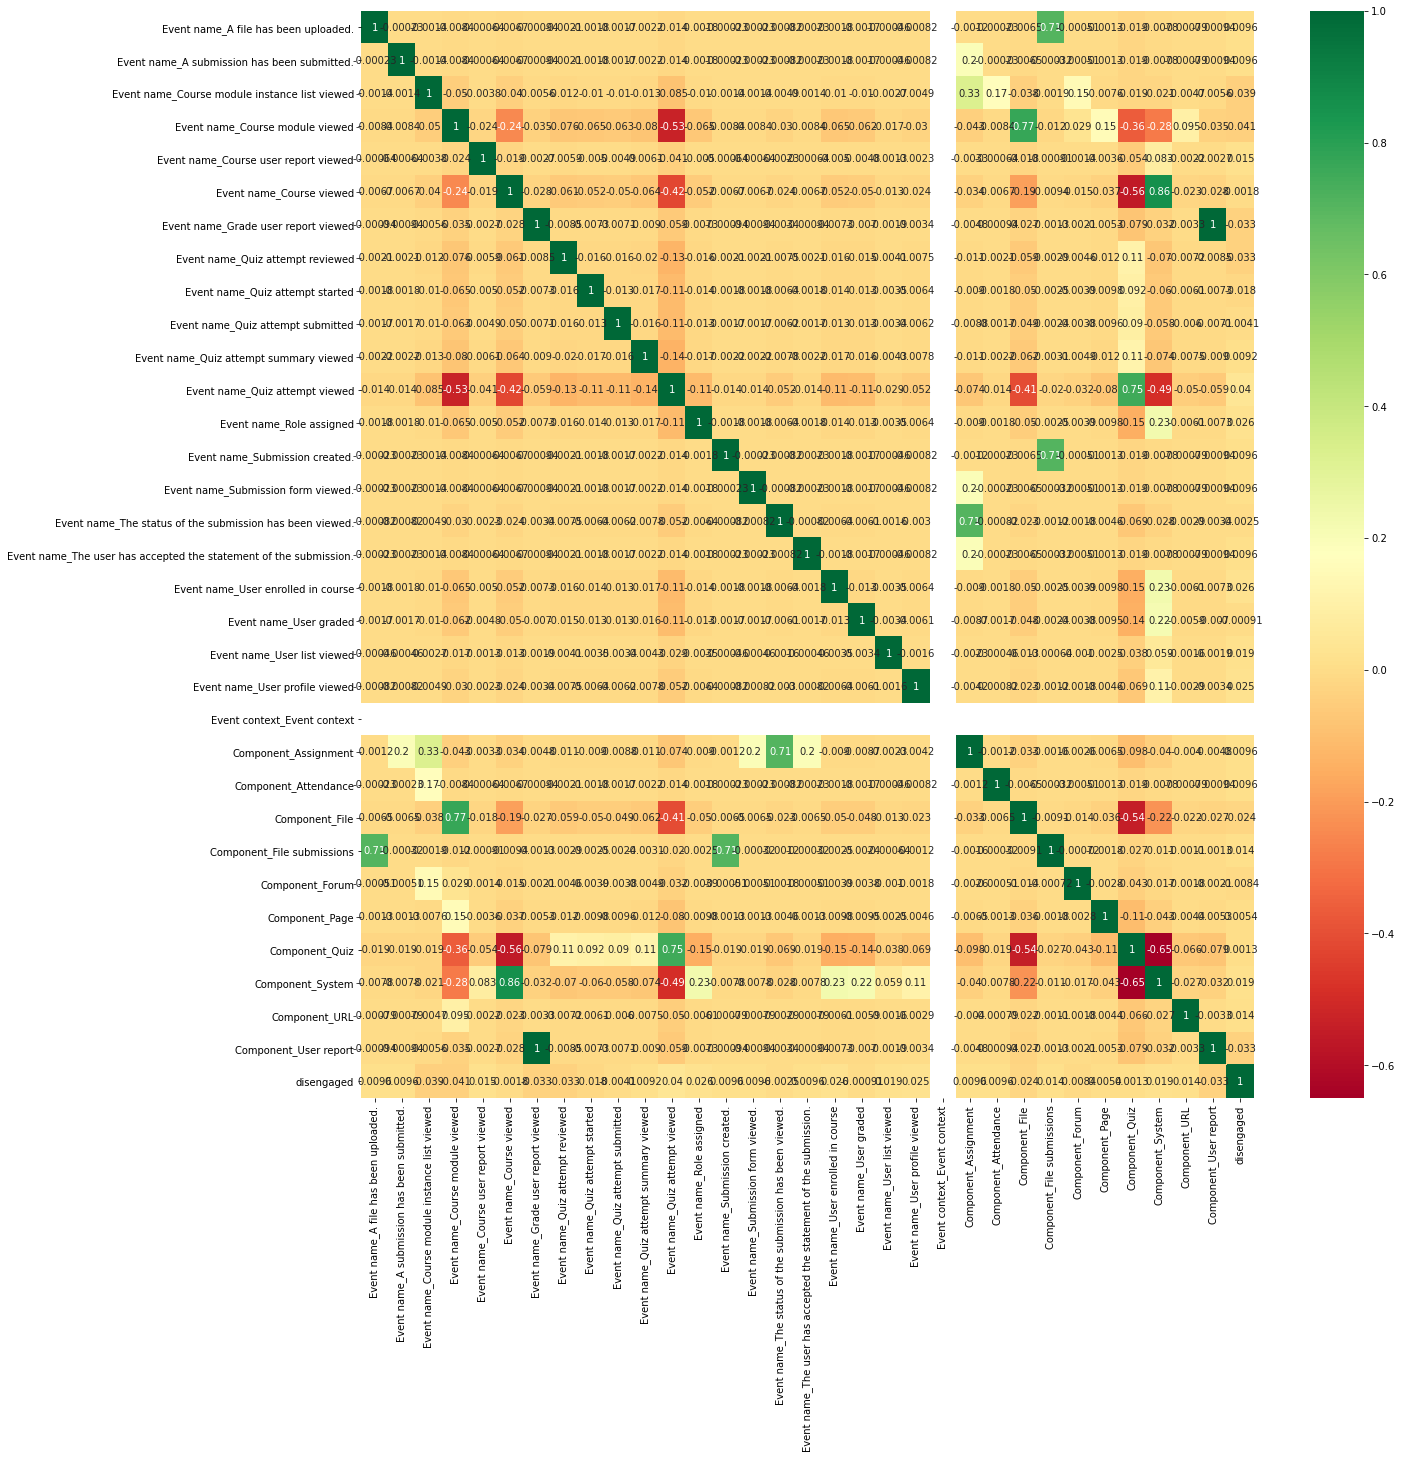

In [178]:
#get correlations of each features in dataset
corrmat = merge_53.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(merge_53[top_corr_features].corr(),annot=True,cmap="RdYlGn")


In [179]:
feattime53 = Xt53[['Event name_Course module instance list viewed','Component_Quiz','Event name_Quiz attempt viewed','Event name_Course module viewed','Event name_Quiz attempt reviewed','Component_Assignment','Event name_Role assigned','Event name_User profile viewed','Event name_User enrolled in course','Component_User report']]

In [180]:
Xt3a = feattime53 # Features
yt3a = yt53 # Target variable

In [181]:
# Create training and testing sets
Xt3a_train, Xt3a_test, yt3a_train, yt3a_test = train_test_split(Xt3a, yt3a, test_size=0.3)


In [182]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logregt3a = LogisticRegression()

# fit the model with data
logregt3a.fit(Xt3a_train,yt3a_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [183]:
yt3a_pred=logregt3a.predict(Xt3a_test)

In [184]:
# Perform 3-fold CV
cvscores_3 = cross_val_score(logregt3a, Xt3a_train, yt3a_train, cv = 3)
print(np.mean(cvscores_3))

# Perform 10-fold CV
cvscores_10 = cross_val_score(logregt3a, Xt3a_train, yt3a_train, cv = 10)
print(np.mean(cvscores_10))

0.708753175813008
0.7084267524006937


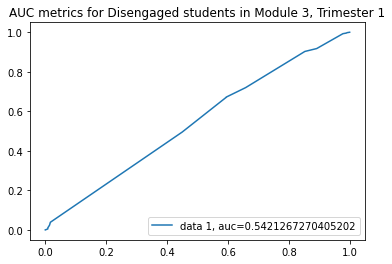

In [185]:
ylg3a_pred_proba = logregt3a.predict_proba(Xt3a_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(yt3a_test,  ylg3a_pred_proba)
auc = metrics.roc_auc_score(yt3a_test, ylg3a_pred_proba)
plt.title('AUC metrics for Disengaged students in Module 3, Trimester 1')
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()
# AUC score for the case is 0.53. AUC score 1 represents perfect classifier, and 0.5 represents a worthless classifier.
#


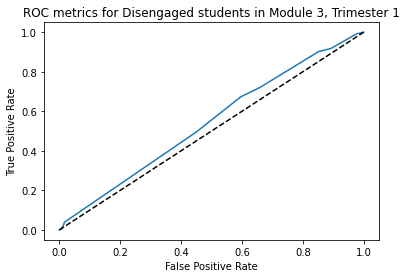

In [186]:
# Calculate the roc metrics
fpr, tpr, thresholds = roc_curve(yt3a_test, ylg3a_pred_proba)

# Plot the ROC curve
plt.plot(fpr, tpr)

# Add labels and diagonal line
plt.title('ROC metrics for Disengaged students in Module 3, Trimester 1')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot([0, 1], [0, 1], "k--")
plt.show()



In [187]:
# Perform 10-fold CV
cvscores_3a = cross_val_score(logregt3a, Xt3a_train, yt3a_train, cv = 10)
print(np.mean(cvscores_3a))

0.7084267524006937


In [188]:
# Perform 10-fold CV
cvscores_10a = cross_val_score(logregt3a, Xt3a_train, yt3a_train, cv = 10)
print(np.mean(cvscores_10a))

0.7084267524006937


In [189]:
print("Accuracy:",metrics.accuracy_score(yt3a_test, yt3a_pred))
print("Precision:",metrics.precision_score(yt3a_test, yt3a_pred))
print("Recall:",metrics.recall_score(yt3a_test, yt3a_pred))
print("F1 Score",metrics.f1_score(yt3a_test, yt3a_pred))


Accuracy: 0.7266514806378133
Precision: 0.7280366692131398
Recall: 0.9958202716823407
F1 Score 0.8411297440423654


In [190]:
# Instantiate the classifier
rfclffs3a = RandomForestClassifier(n_estimators =20)

# Fit to the training data
rfclffs3a.fit(Xt3a_train, yt3a_train)

# Compute accuracy
print(rfclffs3a.score(Xt3a_test, yt3a_test))


0.7281700835231587


In [191]:
# Perform 10-fold CV
cvscores_10rf = cross_val_score(rfclffs3a, Xt3a_train, yt3a_train, cv = 10)
print(np.mean(cvscores_10rf))

0.7087524852997166


In [193]:
from sklearn.svm import SVC

svcfs3a = SVC(kernel='linear',C=0.1)

#Train it, or "fit it", to the data:
svcfs3a.fit(Xt3a_train, yt3a_train)

# Compute accuracy
print(svcfs3a.score(Xt3a_test, yt3a_test))


0.7266514806378133


In [194]:
# Perform 10-fold CV
cvscores_10svc = cross_val_score(svcfs3a, Xt3a_train, yt3a_train, cv = 10)
print(np.mean(cvscores_10svc))

0.7068012606286221


In [195]:
# Create Decision Tree classifer object
dtclffs3a = DecisionTreeClassifier()

# Train Decision Tree Classifer
dtclffs3a = dtclffs3a.fit(Xt3a_train,yt3a_train)

#Predict the response for test dataset
yfs3a_pred = dtclffs3a.predict(Xt3a_test)


In [196]:
# Perform 10-fold CV
cvscores_10dt3a = cross_val_score(dtclffs3a, Xt3a_train, yt3a_train, cv = 10)
print(np.mean(cvscores_10dt3a))

0.7087524852997166


In [197]:
# Generate the confusion matrix and classification report
print(confusion_matrix(yt3a_test, yt3a_pred))
print(classification_report(yt3a_test, yt3a_pred))


[[  4 356]
 [  4 953]]
              precision    recall  f1-score   support

           0       0.50      0.01      0.02       360
           1       0.73      1.00      0.84       957

    accuracy                           0.73      1317
   macro avg       0.61      0.50      0.43      1317
weighted avg       0.67      0.73      0.62      1317



In [ ]:
#````````

In [198]:
# Instantiate bootstrap aggregation model
bagged_model = BaggingClassifier(n_estimators=50, random_state=123)

# Fit
bagged_model.fit(Xt3a_train, yt3a_train)

# Predict
bagged_pred = bagged_model.predict(Xt3a_test)

#print(logregfs1.score(Xfs_train, yfs_train))

# Print accuracy score
print(accuracy_score(yt3a_test, bagged_pred))


0.7274107820804859


In [199]:
# Boosting model
boosted_model = AdaBoostClassifier(n_estimators=50, random_state=123)

# Fit
boosted_model_fit = boosted_model.fit(Xt3a_train, yt3a_train)

# Predict
boosted_pred = boosted_model_fit.predict(Xt3a_test)

# Print model accuracy
print(accuracy_score(yt3a_test, boosted_pred))


0.7274107820804859


In [200]:
# Instantiate
xgb = XGBClassifier(random_state=123, learning_rate=0.1, n_estimators=10, max_depth=3)

# Fit
xgb = xgb.fit(Xt3a_train, yt3a_train)

# Predict
xgb_pred = xgb.predict(Xt3a_test)

# Print accuracy score
print('Final prediction score: [%.8f]' % accuracy_score(yt3a_test, xgb_pred))


Final prediction score: [0.72741078]


In [ ]:
#````````

In [198]:
disengaged3.sum()

52

In [110]:
chi = stats.chisquare(disengaged3)
print(chi)

Power_divergenceResult(statistic=11.000000000000005, pvalue=0.99999999999994638)


In [112]:
# Test significance
alpha= 0.05
if chi[1] < alpha:
    print("Difference between engaged is statistically significant")
else:
    print("No significant difference between disengaged found")

No significant difference between disengaged found
